In [30]:
import os
import xarray as xr
import rioxarray as rio
import numpy as np
import rasterio
from rioxarray.merge import merge_datasets
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import glob

In [27]:
data_dir = r"/home/waves/projects/smap-drydown/data/"
short_name = r"MOD44B.061"
SMAPL3_dir = "SPL3SMP"


In [ ]:
output_dir = os.path.join(data_dir, short_name, "EASE_resampled")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [44]:
# Pattern to match directories only
year=2000
# pattern=f"{short_name}.A{year}*.hdf"
pattern="*.hdf"
fn_pattern = os.path.join(data_dir, short_name, pattern)
print(fn_pattern)
filenames = glob.glob(fn_pattern)
print(filenames)

/home/waves/projects/smap-drydown/data/MOD44B.061/*.hdf
['/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h31v10.061.2022273220744.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2000065.h16v06.061.2022273163717.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2000065.h09v07.061.2022273161341.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h20v06.061.2022273204023.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h11v02.061.2022273192452.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2002065.h08v05.061.2022273203407.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h23v11.061.2022273211549.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2002065.h00v10.061.2022273200624.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2002065.h05v10.061.2022273202501.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A20

In [49]:
# Pattern to match directories only
start_year = 2015
end_year = 2023
for year in range(start_year, end_year + 1):
    pattern=f"MOD44B.A{year}*.hdf"
    # pattern="*.hdf"
    fn_pattern = os.path.join(data_dir, short_name, pattern)
    print(fn_pattern)
    filenames = glob.glob(fn_pattern)
    print(filenames)

/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2015*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2016*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2017*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2018*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2019*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2020*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2021*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2022*.hdf
[]
/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2023*.hdf
[]


In [50]:
year=2001
pattern=f"MOD44B.A{year}*.hdf"
# pattern="*.hdf"
fn_pattern = os.path.join(data_dir, short_name, pattern)
print(fn_pattern)
filenames = glob.glob(fn_pattern)
print(filenames)

/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001*.hdf
['/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h31v10.061.2022273220744.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h20v06.061.2022273204023.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h11v02.061.2022273192452.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h23v11.061.2022273211549.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h06v03.061.2022273191125.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h33v09.061.2022273221643.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h22v08.061.2022273211311.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h28v04.061.2022273214851.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.061/MOD44B.A2001065.h31v12.061.2022273220847.hdf', '/home/waves/projects/smap-drydown/data/MOD44B.06

In [51]:
# ds = xr.open_dataset(os.path.join(output_dir, filenames[0]), engine='netcdf4')
ds_list = []
for filename in filenames:
    print(f"Currently processing {filename}")
    ds = rio.open_rasterio(os.path.join(data_dir, short_name, filename), masked=True)
    proj4_string = "+proj=sinu +R=6371007.181 +nadgrids=@null +wktext"
    ds.rio.write_crs(proj4_string, inplace=True)
    ds_wgs84 = ds.rio.reproject("EPSG:4326")
    # Assuming ds_wgs84 is your xarray Dataset
    veg_variables = ['Percent_Tree_Cover', 'Percent_NonTree_Vegetation', 'Percent_NonVegetated']
    for var in veg_variables:
        ds_wgs84[var] = ds_wgs84[var].where((~ds_wgs84[var].isnull()) & (ds_wgs84[var] != 200), np.nan)

    ds_list.append(ds_wgs84)

In [21]:
ds_merged = merge_datasets(ds_list, nodata=np.nan)
ds_merged.rio.write_crs(proj4_string, inplace=True)
ds_merged

/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(
/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(
/home/raraki/miniconda3/envs/SMAP/lib/python3.12/site-packages/rioxarray/raster_writer.py:130: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(


<xarray.Dataset> Size: 77MB
Dimensions:                     (band: 1, x: 7035, y: 391)
Coordinates:
  * band                        (band) int64 8B 1
  * x                           (x) float64 56kB -180.0 -179.9 ... 179.9 180.0
  * y                           (y) float64 3kB 9.974 9.923 ... -9.932 -9.983
    spatial_ref                 int64 8B 0
Data variables:
    Percent_Tree_Cover          (band, y, x) float32 11MB nan nan ... nan nan
    Percent_NonTree_Vegetation  (band, y, x) float32 11MB nan nan ... nan nan
    Percent_NonVegetated        (band, y, x) float32 11MB nan nan ... nan nan
    Quality                     (band, y, x) float32 11MB nan nan ... nan nan
    Percent_Tree_Cover_SD       (band, y, x) float32 11MB nan nan ... nan nan
    Percent_NonVegetated_SD     (band, y, x) float32 11MB nan nan ... nan nan
    Cloud                       (band, y, x) float32 11MB nan nan ... nan nan
Attributes: (12/49)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:      MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:        Terra
    ASSOCIATEDSENSORSHORTNAME.1:          MODIS
    AUTOMATICQUALITYFLAG.1:               Passed
    AUTOMATICQUALITYFLAGEXPLANATION.1:    set Passed as default, will decide ...
    DAYNIGHTFLAG:                         Day
    ...                                   ...
    SHORTNAME:                            MOD44B
    SOUTHBOUNDINGCOORDINATE:              0.0
    TileID:                               51000008
    VERSIONID:                            61
    VERTICALTILENUMBER:                   8
    WESTBOUNDINGCOORDINATE:               -179.999999983835

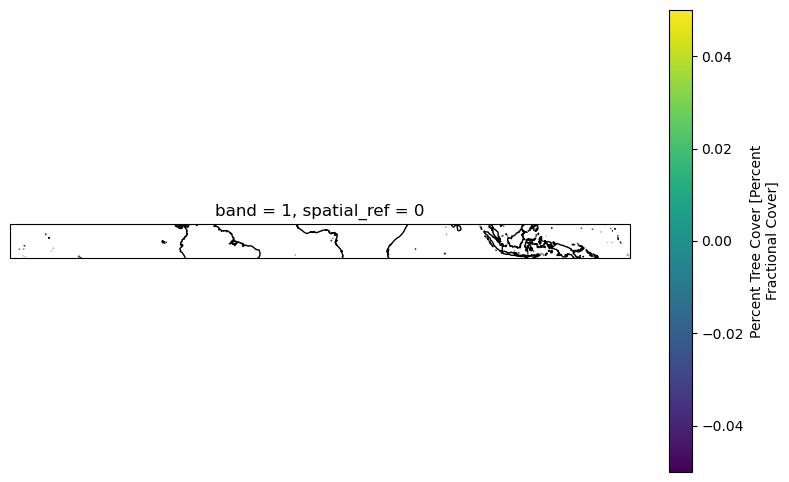

In [23]:
# # https://corteva.github.io/rioxarray/html/examples/merge.html

# # Create a plot
# plt.figure(figsize=(10, 6))
# ax = plt.axes(projection=ccrs.PlateCarree())  # Set the projection to Plate Carree (longitude/latitude)
# ax.coastlines()  # Add coastlines

# # Assume the data variable to plot is named 'temperature'; adjust as per your dataset specifics
# ds_merged['Percent_Tree_Cover'].sel(band=1).plot(
#     ax=ax, 
#     transform=ccrs.PlateCarree(),  # Specifies the data's projection
#     x='x', y='y',  # Adjust according to your data dimensions
#     cmap='viridis'  # Color map
# )

# # ax.set_title('Temperature Data Visualization')
# plt.show()

In [28]:
def get_filepath_from_pattern(filename_pattern, directory):
    file_paths = glob.glob(os.path.join(directory, filename_pattern))
    print(f"{filename_pattern}: {len(file_paths)} files available")
    return file_paths

class EASEgrid_template:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.row_index, self.column_index, self.longitude, self.latitude = (
            self.get_grid_coordinate()
        )
        self.varname = "SPL3SMP"
        self.timestep = 365
        self.filenames = self.get_filepath()
        self.data = self.get_template_dataset()

    def get_grid_coordinate(self):
        SMAPL3_grid_sample = os.path.join(
            self.data_dir, r"SPL3SMP/SMAP_L3_SM_P_20150331_R18290_001.h5"
        )

        ncf = netCDF4.Dataset(SMAPL3_grid_sample, diskless=True, persist=False)
        nch_am = ncf.groups.get("Soil_Moisture_Retrieval_Data_AM")
        nch_pm = ncf.groups.get("Soil_Moisture_Retrieval_Data_PM")

        # Return as regular numpy array rather than masked array
        _latitude = ma.getdata(
            nch_am.variables["latitude"][:].filled(fill_value=np.nan), subok=True
        )
        _longitude = ma.getdata(
            nch_am.variables["longitude"][:].filled(fill_value=np.nan), subok=True
        )
        _EASE_column_index = ma.getdata(
            nch_am.variables["EASE_column_index"][:].astype(int).filled(fill_value=-1),
            subok=True,
        )
        _EASE_row_index = ma.getdata(
            nch_am.variables["EASE_row_index"][:].astype(int).filled(fill_value=-1),
            subok=True,
        )

        # Coordinates with no data are skipped --- fill them
        latitude = np.nanmax(_latitude, axis=1)
        EASE_row_index = np.nanmax(_EASE_row_index, axis=1)
        longitude = np.nanmax(_longitude, axis=0)
        EASE_column_index = np.nanmax(_EASE_column_index, axis=0)

        return EASE_row_index, EASE_column_index, longitude, latitude

    def get_filepath(self):
        filepaths = get_filepath_from_pattern(
            filename_pattern=f"SMAP_L3_SM_P_*.h5",
            directory=f"{data_dir}/{self.varname}",
        )
        return filepaths

    def get_template_dataset(self):
        _ds_SMAPL3 = xr.open_dataset(
            self.filenames[0],
            engine="rasterio",
            group="Soil_Moisture_Retrieval_Data_AM",
            variable=["soil_moisture"],
        )
        ds_SMAPL3_coord_template = _ds_SMAPL3.assign_coords(
            {"x": self.longitude, "y": self.latitude}
        ).rio.write_crs("epsg:4326")
        return ds_SMAPL3_coord_template

In [31]:
# Execute
SMAPL3_grid_sample = os.path.join(
    data_dir, r"SPL3SMP/SMAP_L3_SM_P_20150331_R18290_001.h5"
)
ncf = netCDF4.Dataset(SMAPL3_grid_sample, diskless=True, persist=False)
nch_am = ncf.groups.get("Soil_Moisture_Retrieval_Data_AM")
nch_pm = ncf.groups.get("Soil_Moisture_Retrieval_Data_PM")

# Return as regular numpy array rather than masked array
_latitude = ma.getdata(
    nch_am.variables["latitude"][:].filled(fill_value=np.nan), subok=True
)
_longitude = ma.getdata(
    nch_am.variables["longitude"][:].filled(fill_value=np.nan), subok=True
)
_EASE_column_index = ma.getdata(
    nch_am.variables["EASE_column_index"][:].astype(int).filled(fill_value=-1),
    subok=True,
)
_EASE_row_index = ma.getdata(
    nch_am.variables["EASE_row_index"][:].astype(int).filled(fill_value=-1),
    subok=True,
)

# Coordinates with no data are skipped --- fill them
latitude = np.nanmax(_latitude, axis=1)
EASE_row_index = np.nanmax(_EASE_row_index, axis=1)
longitude = np.nanmax(_longitude, axis=0)
EASE_column_index = np.nanmax(_EASE_column_index, axis=0)

filepaths = get_filepath_from_pattern(
    filename_pattern=f"SMAP_L3_SM_P_*.h5", directory=f"{data_dir}/SPL3SMP"
)
_ds_SMAPL3 = xr.open_dataset(
    filepaths[0],
    engine="rasterio",
    group="Soil_Moisture_Retrieval_Data_AM",
    variable=["soil_moisture"],
)
ds_SMAPL3_coord_template = _ds_SMAPL3.assign_coords(
    {"x": longitude, "y": latitude}
).rio.write_crs("epsg:4326")
ease_template = (
    ds_SMAPL3_coord_template.Soil_Moisture_Retrieval_Data_AM_soil_moisture
)
ease_template

SMAP_L3_SM_P_*.h5: 2675 files available


<xarray.DataArray 'Soil_Moisture_Retrieval_Data_AM_soil_moisture' (band: 1,
                                                                   y: 406,
                                                                   x: 964)> Size: 2MB
[391384 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float32 4kB -179.8 -179.4 -179.1 ... 179.1 179.4 179.8
  * y            (y) float32 2kB 83.63 81.48 79.77 78.3 ... -79.77 -81.48 -83.63
    spatial_ref  int64 8B 0
Attributes:
    coordinates:  /Soil_Moisture_Retrieval_Data_AM/latitude /Soil_Moisture_Re...
    long_name:    Representative DCA soil moisture measurement for the Earth ...
    units:        cm**3/cm**3
    valid_max:    0.5
    valid_min:    0.02

In [32]:
ds_resampled = ds_merged.interp_like(ease_template, method='linear', kwargs={'fill_value': np.nan})

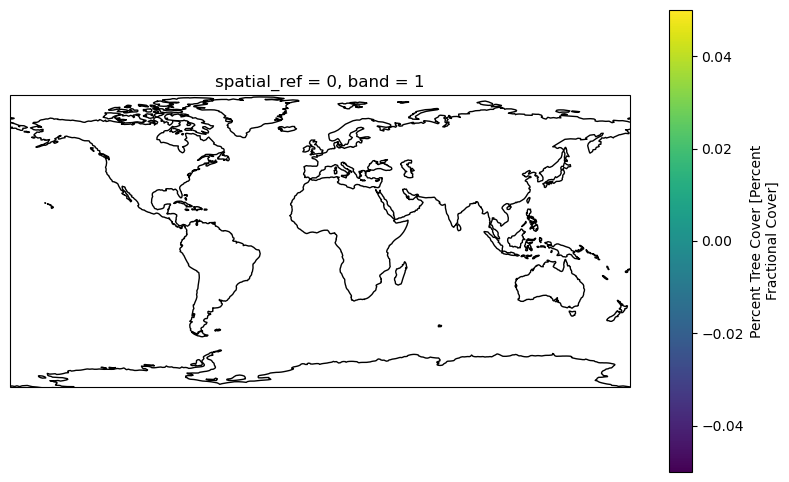

In [33]:
# https://corteva.github.io/rioxarray/html/examples/merge.html

# Create a plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Set the projection to Plate Carree (longitude/latitude)
ax.coastlines()  # Add coastlines

# Assume the data variable to plot is named 'temperature'; adjust as per your dataset specifics
ds_resampled['Percent_Tree_Cover'].sel(band=1).plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),  # Specifies the data's projection
    x='x', y='y',  # Adjust according to your data dimensions
    cmap='viridis'  # Color map
)

# ax.set_title('Temperature Data Visualization')
plt.show()